# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [238]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [239]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [223]:
#  1. Get the total rides for each city type
type_ride_count = pyber_data_df.groupby(["type"]).count()["ride_id"]
type_ride_count

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [224]:
# 2. Get the total drivers for each city type
type_driver_count = city_data_df.groupby(["type"]).sum()["driver_count"]
type_driver_count

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [225]:
#  3. Get the total amount of fares for each city type
type_fare_count = pyber_data_df.groupby(["type"]).sum()["fare"]
type_fare_count

type
Rural       4,327.93
Suburban   19,356.33
Urban      39,854.38
Name: fare, dtype: float64

In [226]:
#  4. Get the average fare per ride for each city type. 
type_fare_aver = pd.DataFrame(type_fare_count/type_ride_count)
type_fare_aver

,0
type,
Rural,34.62
Suburban,30.97
Urban,24.53


In [227]:
# 5. Get the average fare per driver for each city type. 
type_farePerDriver_aver = pd.DataFrame(type_fare_count/type_driver_count)
type_farePerDriver_aver

,0
type,
Rural,55.49
Suburban,39.50
Urban,16.57


In [228]:
#  6. Create a PyBer summary DataFrame. 
PyBer_summary_df = pd.merge(type_ride_count,    type_driver_count   ,how="right", on="type")
PyBer_summary_df = pd.merge(PyBer_summary_df,   type_fare_count     ,how="right", on="type")
PyBer_summary_df = pd.merge(PyBer_summary_df,   type_fare_aver     ,how="right", on="type")
PyBer_summary_df = pd.merge(PyBer_summary_df,   type_farePerDriver_aver     ,how="right", on="type")
PyBer_summary_df.columns = PyBer_summary_col

In [229]:
#  7. Cleaning up the DataFrame. Delete the index name
PyBer_summary_df.index.name = None

In [230]:
#  8. Format the columns.
PyBer_summary_col= ['Total Rides','Total Drivers', 'Total Fares', 'Average Fare per Ride', 'Average Fare per Driver']
pd.options.display.float_format = '{:,.2f}'.format
PyBer_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"4,327.93",34.62,55.49
Suburban,625,490,"19,356.33",30.97,39.50
Urban,1625,2405,"39,854.38",24.53,16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [240]:
# 1. Read the merged DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [277]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
pyber_data2_df = pd.DataFrame(pyber_data_df)

#pyber_data2_df['date'] = pd.to_datetime(pyber_data2_df['date']).dt.date
pyber_data2_df = pyber_data_df.groupby(["date","type"]).sum()["fare"]
pyber_data2_df.head()

date                 type    
2019-01-01 00:08:16  Urban      37.91
2019-01-01 00:46:46  Suburban   47.74
2019-01-01 02:07:24  Suburban   24.07
2019-01-01 03:46:50  Urban       7.57
2019-01-01 05:23:21  Urban      10.75
Name: fare, dtype: float64

In [278]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()

#pyber_data2_df['date'] =  pd.to_datetime(pyber_data2_df['date'], format='%Y-%m-%d %X')
pyber_data2_df = pyber_data2_df.reset_index()
pyber_data2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2375 entries, 0 to 2374
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    2375 non-null   object 
 1   type    2375 non-null   object 
 2   fare    2375 non-null   float64
dtypes: float64(1), object(2)
memory usage: 55.8+ KB


In [279]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
type_date_fares_df = pyber_data2_df.pivot(index="date",columns="type", values="fare")
type_date_fares_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2375 entries, 2019-01-01 00:08:16 to 2019-05-08 13:10:18
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     125 non-null    float64
 1   Suburban  625 non-null    float64
 2   Urban     1625 non-null   float64
dtypes: float64(3)
memory usage: 74.2+ KB


In [293]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
#date_range = pd.date_range(start='2019-01-01', end='2019-04-29')
type_date_fares_df = type_date_fares_df.loc['2019-01-01 00:00:00':'2019-04-29 00:00:00']
type_date_fares_df.tail()


type,Rural,Suburban,Urban
date,,,
2019-04-28 14:28:36,nan,nan,11.46
2019-04-28 16:29:16,nan,nan,36.42
2019-04-28 17:26:52,nan,nan,31.43
2019-04-28 17:38:09,nan,34.87,nan
2019-04-28 19:35:03,nan,16.96,nan


In [294]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
type_date_fares_df.index = pd.to_datetime(type_date_fares_df.index)

In [295]:
# 7. Check that the datatype for the index is datetime using df.info()
type_date_fares_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [296]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
type_date_fares_df.resample('W').sum()

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,"1,661.68"
2019-01-13,67.65,"1,105.13","2,050.43"
2019-01-20,306.00,"1,218.20","1,939.02"
2019-01-27,179.69,"1,203.28","2,129.51"
2019-02-03,333.08,"1,042.79","2,086.94"
2019-02-10,115.80,974.34,"2,162.64"
2019-02-17,95.82,"1,045.50","2,235.07"
2019-02-24,419.06,"1,412.74","2,466.29"
2019-03-03,175.14,858.46,"2,218.20"


<AxesSubplot:xlabel='date', ylabel='Fares ($USD)'>

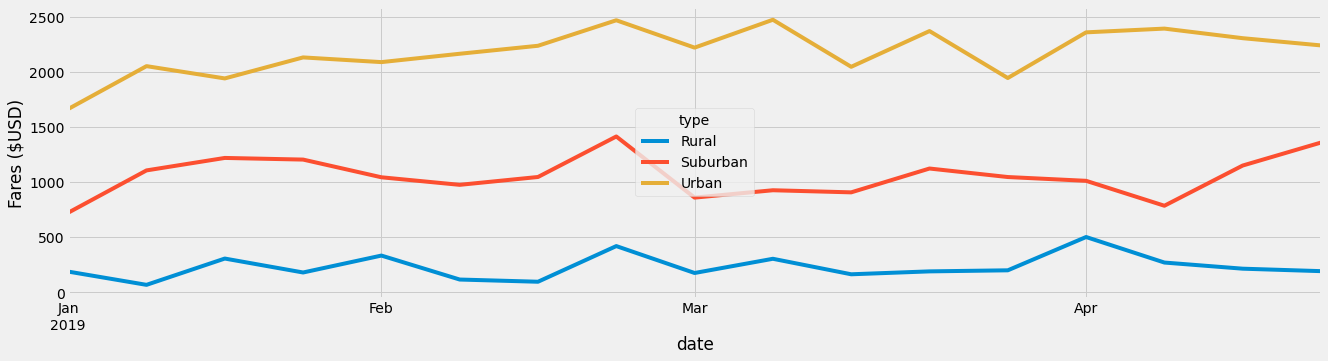

In [308]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')
type_date_fares_df.resample('W').sum().plot(ylabel="Fares ($USD)",figsize=(20,5))
